In [1]:
# # Introducton

# In this activity, we're going to use decision trees to determine the redshifts of galaxies from their photometric colours. We'll use galaxies where accurate spectroscopic redshifts have been calculated as our gold standard. We will learn how to assess the accuracy of the decision trees predictions and have a look at validation of our model.
# We will also have a quick look at how this problem might be approached without using machine learning. This will highlight some of the limitations of the classical approach and demonstrate why a machine learning approach is ideal for this type of problem.
# If you want to run your code offline, you can download the full NumPy dataset for this activity here.
# This activity is based on the scikit-learn example on Photometric Redshifts of Galaxies.

# # Magnitudes And Colors 

# We will be using flux magnitudes from the Sloan Digital Sky Survey (SDSS) catalogue to create colour indices. Flux magnitudes are the total flux (or light) received in five frequency bands (u, g, r, i and z).
# https://groklearning-cdn.com/modules/TYPnbyWbJVHGcaNudF4Nak/plot_sdss_filters_11.png
# The astronomical colour (or colour index) is the difference between the magnitudes of two filters, i.e. u - g or i - z.
# This index is one way to characterise the colours of galaxies. For example, if the u-g index is high then the object is brighter in ultra violet frequencies than it is in visible green frequencies.
# Colour indices act as an approximation for the spectrum of the object and are useful for classifying stars into different types.    

# # What do we need? 

# To calculate the redshift of a distant galaxy, the most accurate method is to observe the optical emission lines and measure the shift in wavelength. However, this process can be time consuming and is thus infeasible for large samples.
# For many galaxies we simply don't have spectroscopic observations.
# Instead, we can calculate the redshift by measuring the flux using a number of different filters and comparing this to models of what we expect galaxies to look like at different redshifts.
# In this activity, we will use machine learning to obtain photometric redshifts for a large sample of galaxies. We will use the colour indices (u-g, g-i, r-i and i-z) as our input and a subset of sources with spectroscopic redshifts as the training dataset.



In [9]:
# # Decision Tree Algorithms

# Decision trees are a tool that can be used for both classification and regression. In this module we will look at regression, however, in the next module we will see how they can be used as classifiers.
# Decision trees map a set of input features to their corresponding output targets. This is done through a series of individual decisions where each decision represents a node (or branching) of the tree.
# The following figure shows the decision tree our proverbial robot tennis player Robi used in the lectures to try and decide whether to play tennis on a particular day.
# https://groklearning-cdn.com/modules/oqviMCYkoRqeu76VKnwRsn/tennis.png
# Each node represents a decision that the robot needs to make (or assess) to reach a final decision. In this example, the decision tree will be passed a set of input features (Outlook, Humidity and Wind) and will return an output of whether to play or not.


# #Decision Tree for Regression 

# In decision trees for real-world tasks, each decision is typically more complex, involving measured values, not just categories.
# Instead of the input values for humidity being Normal or High and wind being Strong or Weak we might see a percentage between 0 and 100 for humidity and a wind speed in km/hr for wind. Our decisions might then be humidity < 40% or wind < 5 km/hr.
# The output of regression is a real number. So, instead of the two outputs of Play and Don't Play we have a probability of whether we will play that day.
# The decision at each branch is determined from the training data by the decision tree learning algorithm. Each algorithm employs a different metric (e.g. Gini impurity or information gain) to find the decision that splits the data most effectively.
# For now, just need to know that a decision tree is a series of decisions, each made on a single feature of the data. The end point of all the branches is a set of desired target values.


# # Decision Trees in Python

# The inputs to our decision tree are the colour indices from photometric imaging and our output is a photometric redshift. Our training data uses accurate spectroscopic measurements.
# The decision tree will look something like the following.
# https://groklearning-cdn.com/modules/5PUcnT5fqRn5wTUXw7kg2B/decisiontree_1.png
# We can see how our calculated colour indices are input as features at the top and through a series of decision nodes a target redshift value is reached and output.
# We will be using the Python machine learning library scikit-learn which provides several machine learning algorithms.
# The scikit-learn decision tree regression takes a set of input features and the corresponding target values, and constructs a decision tree model that can be applied to new data.    


# # Sloan Digital Sky Survey

# We have provided the Sloan data in NumPy binary format (.npy) in a file called sdss_galaxy_colors.npy. The Sloan data is stored in a NumPy structured array.
# It also include spec_class and redshift_err columns we don't need in this activity. The data can be loaded using:
import numpy as np
data = np.load('sdss_galaxy_colors.npy')
print(data[0])
# The data[0] corresponds to the first row of the table above. Individual named columns can be accessed like this:
import numpy as np
data = np.load('sdss_galaxy_colors.npy')
print(data['u'])    
# Each flux magnitude column can be accessed in the data array as data['u'], data['g'] etc. The redshifts can accessed with data['redshift'].    

print("\n\n")



# # Assignment 1 : 

# Write a get_features_targets function that splits the training data into input features and their corresponding targets. In our case, the inputs are the 4 colour indices and our targets are the corresponding redshifts.
# Your function should return a tuple of:
# 1. features: a NumPy array of dimensions m ⨉ 4, where m is the number of galaxies;
# 2. targets: a 1D NumPy array of length m, containing the redshift for each galaxy.
# The data argument will be the structured array described on the previous slide. The u flux magnitudes and redshifts can be accessed as a column with data['u'] and data['redshift'].
# The four features are the colours u - g, g - r, r - i and i - z. To calculate the first column of features, subtract the u and g columns, like this:

import numpy as np
data = np.load('sdss_galaxy_colors.npy')
print(data['u'] - data['g'])

# Hint: set up your features array with zeros
# You can set up the features array with zeros and then set each column to the corresponding calculated feature.

# features = np.zeros((data.shape[0], 4))
# features[:, 0] = data['u'] - data['g']


print("\n\n")
print("\n\n")


# # Assignment Code
# We create a empty numpy array with numpy.zeros() of the shape mxn. Using numpy's vector algebra operations and the ':' index we assign the calculated colours to the corresponding column of the features array.


import numpy as np

def get_features_targets(data):
  features = np.zeros(shape=(len(data), 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets


if __name__ == "__main__":
  # load the data
  data = np.load('sdss_galaxy_colors.npy')
    
  # call our function 
  features, targets = get_features_targets(data)
    
  # print the shape of the returned arrays
  print("Output :")
  print(features[:2])
  print(targets[:2])

(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301, 6.543622e-05)
[19.84132 19.86318 19.97362 ... 19.82667 19.98672 18.00024]



[0.31476 1.2002  1.65941 ... 1.72629 0.23287 0.19067]






Output :
[[0.31476 0.0571  0.28991 0.07192]
 [1.2002  0.82026 0.45294 0.24665]]
[0.539301  0.1645703]


In [16]:

# # Assignment: decision Tree Regressor

# We are now going to use our features and targets to train a decision tree and then make a prediction. We are going to use the DecisionTreeRegressor class from the sklearn.tree module.
# The decision tree regression learning algorithm is initialised with:

# dtr = DecisionTreeRegressor()

# We will discuss some optimisations later in the activity, but for now we are just going to use the default values.
# To train the model, we use the fit method with the features and targets we created earlier:

# dtr.fit(features, targets)

# The decision tree is now trained and ready to make a prediction:

# predictions = dtr.predict(features)

# predictions is an array of predicted values corresponding to each of the input variables in the array.
# Your task is to put this together for our photometric redshift data. Copy your get_features_targets from the previous problem. Use the comments to guide your implementation.
# Finally, print the first 4 predictions. It should print this:

# [ 0.539301    0.1645703   0.04190006  0.04427702]


# # Assignment Code: 

# Here we follow each of the steps in the problem description, replacing x and y with our features and targets arrays. The only addition is to sort the resulting predicted_redshifts array and print the first element. Note that the numpy sort() function acts in place and there is no returns value.

import numpy as np
from sklearn.tree import DecisionTreeRegressor

# copy in your get_features_targets function here
def get_features_targets(data):
  features = np.zeros(shape=(len(data), 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# load the data and generate the features and targets
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)
  
# initialize model
dtr = DecisionTreeRegressor()

# train the model
dtr.fit(features, targets)

# make predictions using the same features
predictions = dtr.predict(features)

# print out the first 4 predicted redshifts
print(predictions[:4])

[0.539301   0.1645703  0.04190006 0.04427702]


In [18]:
# # Evaluating our Accuracy: 

# So we trained a decision tree! Great...but how do we know if the tree is actually any good at predicting redshifts?
# In regression we compare the predictions generated by our model with the actual values to test how well our model is performing. The difference between the predicted values and actual values (sometimes referred to as residuals) can tell us a lot about where our model is performing well and where it is not.
# While there are a few different ways to characterise these differences, in this tutorial we will use the median of the differences between our predicted and actual values. This is given by:
#     med_diff = median(|Y(i,pred)-Y(i,act)|)
# Where || denotes the absolute value of the difference.


# # Assignment : Calculating the median Difference

# In this problem we will implement the function median_diff. The function should calculate the median residual error of our model, i.e. the median difference between our predicted and actual redshifts.
# The median_diff function takes two arguments – the predicted and actual/target values. When we use this function later in the tutorial, these will corresponding to the predicted redshifts from our decision tree and their corresponding measured/target values.
# The median of differences should be calculated according to the formula:
#     med_diff = median(|Y(i,pred)-Y(i,act)|)

# # Assignment code : 

# To calculate the median_diff we use NumPy's median and abs functions.
# Write a function that calculates the median of the differences between our predicted and actual values

# write a function that calculates the median of the differences
# between our predicted and actual values
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# copy in your get_features_targets function here
def get_features_targets(data):
  features = np.zeros(shape=(len(data), 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets



def median_diff(predicted, actual):
  return np.median(np.abs(predicted[:] - actual[:]))








if __name__ == "__main__":
  # load testing data
  #   targets = np.load('targets.npy')
  #   predictions = np.load('predictions.npy')

  # load the data and generate the features and targets
  data = np.load('sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

    # initialize model
  dtr = DecisionTreeRegressor()

    # train the model
  dtr.fit(features, targets)

    # make predictions using the same features
  predictions = dtr.predict(features)

    # print out the first 4 predicted redshifts
  print(predictions[:4])

  # call your function to measure the accuracy of the predictions
  diff = median_diff(predictions, targets)

  # print the median difference
  print("Median difference: {:0.4f}".format(diff))


[0.539301   0.1645703  0.04190006 0.04427702]
Median difference: 0.0000


In [21]:
# # Evaluating our Results: Validation

# We previously used the same data for training and testing our decision trees.
# This gives an unrealistic estimate of how accurate the model will be on previously unseen galaxies because the model has been optimised to get the best results on the training data.
# The simplest way to solve this problem is to split our data into training and testing subsets:

# # initialise and train the decision tree
# dtr = DecisionTreeRegressor()
# dtr.fit(train_features, train_targets)

# # get a set of prediction from the test input features
# predictions = dtr.predict(test_features)

# # compare the accuracy of the pediction againt the actual values
# print(calculate_rmsd(predictions, test_targets))

#This method of validation is the most basic approach to validation and is called held-out validation. We will use the med_diff accuracy measure and hold-out validation in the next problem to assess the accuracy of our decision tree.




# # Assignment: validating Our Model

# In this problem, we will use median_diff from the previous question to validate the decision tree model. Your task is to complete the validate_model function.
# The function should split the features and targets into train and test subsets, like this 50:50 split for features:

# split = features.shape[0]//2
# train_features = features[:split]
# test_features = features[split:]

# Your function should then use the training split (train_features and train_targets) to train the model.
# Finally, it should measure the accuracy of the model using median_diff on the test_targets and the predicted redshifts from test_features.

# The function should take 3 arguments:
# * model: the decision tree regressor;
# * features - the features for the data set;
# * targets - The targets for the data set.

# Hint: keep features and targets together!
# When splitting the features and targets be careful to ensure that the train_features have the correct train_targets, i.e. train_features[0] corresponds to train_targets[0] etc.




# # Assignment code : 

# We use a index (split_index) to divide our features and targets into train_features, test_features, train_targets and test_targets.
# We then train the model with the train_features and train_targets arrays, get some predictions from the test_features and get median of the differences between the predicted and actual values ( predicted_redshifts and test_targets respectively).

import numpy as np
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# write a function that splits the data into training and testing subsets
# trains the model and returns the prediction accuracy with median_diff
def validate_model(model, features, targets):
  # split the data into training and testing
  split = 2*features.shape[0]//3
  train_features, test_features = features[:split], features[split:]
  train_targets, test_targets = targets[:split], targets[split:]

  # train the model
  model.fit(train_features, train_targets)

  # get the predicted_redshifts
  predictions = model.predict(test_features)  
  
  # use median_diff function to calculate the accuracy
  return median_diff(test_targets, predictions)


if __name__ == "__main__":
  data = np.load('sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model
  dtr = DecisionTreeRegressor()

  # validate the model and print the med_diff
  diff = validate_model(dtr, features, targets)
  print('Median difference: {:f}'.format(diff))

Median difference: 0.021504


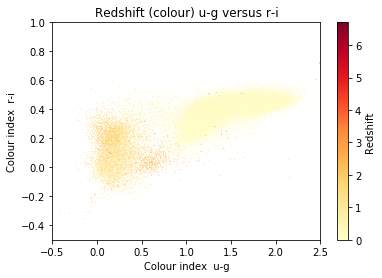

In [23]:
# # Exploring the Output Tree

# But what does the decision tree actually look like?

# Decision tree image
# https://groklearning-cdn.com/modules/E3u6xHw8LC8V75vTJ5ZvdG/decision_tree.jpg
    
    
# You can see how the decision is made at each node as well as the number of samples which reach that node. We won't go through how to make these plots in the tutorial, but you can download a demo script and data to try at home.
# The median of differences of (approx)0.02. This means that half of our galaxies have a error in the prediction of , which is pretty good. One of the reason we chose the median of differences as our accuracy measure is that it gives a fair representation of the errors especially when the distribution of errors is skewed. The graph below shows the distribution of residuals (differences) for our model along with the median and interquartile values.

# Residual distribution
# https://groklearning-cdn.com/modules/7sF2Vds9J4hmG39GYztEPD/residuals.png

# As you can tell the distribution is very skewed. We have zoomed in here, but the tail of the distribution goes all the way out to 6.




# # Effect of training set size

# The number of galaxies we use to train the model has a big impact on how accurate our predictions will be. This is the same with most machine learning methods: the more data that they are trained with, the more accurate their prediction will be.
# Here is how our median difference changes with training set size:

# Training galaxies	median_diff
# 50	0.048
# 500	0.026
# 5000	0.023
# 50000	0.022

# Understanding how the accuracy of the model changes with sample size is important to understanding the limitations of our model. We are approaching the accuracy limit of the decision tree model (for our redshift problem) with a training sample size of 25,000 galaxies.
# The only way we could further improve our model would be to use more features. This might include more colour indices or even the errors associated with the measured flux magnitudes.




# # Before Machine Learning

# Before machine learning, we would have tried to solve this problem with regression — by constructing an empirical model to predict how the dependent variable (redshift) varies with one or more independent variables (the colour indices).
# A plot of how the colours change with redshift tells us that it is quite a complex function, for example redshift versus u - g:

# Redshift vs Colour-Index (u-g)
# https://groklearning-cdn.com/problems/SKULeCQhsJ4Ew7DtbPd6ri/redshift-U-G.png

# One approach would be to construct a multi-variate non-linear regression model. Perhaps using a least squares fitting to try and determine the best fit parameters. The model would be quite complex; based on the above plot, a dampened inverse sine function would be a good starting point for such a model.
# While we could try such an approach the function would be overly complex and there is no guarantee that it would yield very promising results. Another approach would be to plot a colour-index vs colour-index plot using an additional colour scale to show redshift. The following plot is an example of such a plot.

# Colour index vs colour index vs redshift plot
# https://groklearning-cdn.com/problems/PEBuctPTbbMiee3vv9tkL3/redshift-colour-colour.png

# It shows that we get reasonably well defined regions where redshifts are similar. If we were to make a contour map of the redshifts in the colour index vs colour index space we would be able to get an estimate of the redshift for new data points based on a combination of their colour indices. This would lead to redshift estimates with significant uncertainties attached to them.
# In the next problem you will re-create the Colour-index vs Colour-index plot with redshift as colour bar.





# # Assignment : Colour - Colour Redshift Plot

# Your task here is simply to try and re-create the following plot.

# Colour index vs colour index vs redshift plot
# https://groklearning-cdn.com/problems/PEBuctPTbbMiee3vv9tkL3/redshift-colour-colour.png
    
# You should use the pyplot module of matplotlib which has already been imported and can be accessed through plt. In particular you can use the plt.scatter() function, with additional arguments s, c and cmap.
# We are interested in the u-g and r-i colour indices.
# You can make use of the plt.colorbar() function to show your scatter plots colour argument(c) to a colour bar on the side of the plot.
# Make sure you implement x and y labels and give your plot a title.

# Gotchas:
# In order to get your plot working with colours you will need to set the optional parameter lw=number. There are a lot of small points and unless we set the linewidth to zero the line surrounding each point will block out the point itself.
# You should also specify the size of your plot points with the additional call arguments s=number. A reasonable place to start might be 1, but see what it looks like.



# # Assignment Code: 
# We start by creating the three data arrays that we want to use in our plot, u_g, r_i and redshift.
# We then plot our data with...

# plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)

# Where cmap is the supplied colourmap, s=0.5 specifies the thickness of the points, lw=0 sets the linewidth to zero so it doesn't saturate the points and c=redshift sets the colour of the points. We use the returned plot to add a colorbar in the next line.

# cb = plt.colorbar(plot)

# We then add a colour bars label with..

# cb.set_label('Redshift')

# The remainder of the code sets the x and y axis labels as well as the title. We also set limits on both axis to focus on the area of interest.

import numpy as np
from matplotlib import pyplot as plt

# Complete the following to make the plot
if __name__ == "__main__":
    data = np.load('sdss_galaxy_colors.npy')
    # Get a colour map
    cmap = plt.get_cmap('YlOrRd')

    # Define our colour indexes u-g and r-i
    u_g = data['u'] - data['g']
    r_i = data['r'] - data['i']

    # Make a redshift array
    redshift = data['redshift']

    # Create the plot with plt.scatter
    plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)

    cb = plt.colorbar(plot)
    cb.set_label('Redshift')

    # Define your axis labels and plot title
    plt.xlabel('Colour index  u-g')
    plt.ylabel('Colour index  r-i')
    plt.title('Redshift (colour) u-g versus r-i')

    # Set any axis limits
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1)

    plt.show()

In [24]:
# # Summary

# In this activity, we implemented some decision tree models to help predict the redshift of galaxies based on their measured colour indices. We learnt that there are several ways to assess the accuracy of the model and in our validations we used the median of the residuals.
# We touched on how the problem might be approached without machine learning and found that there isn't too much available that can be simply used.
# We also learnt why we need to cross validate the model and that this is done by splitting the data into seperate training and testing subsets. We will look at k-fold cross validation in the next tutorial; where the testing and training are changed to include various combinations of  seperate subsets.
# In the next tutorial we will also explore how decision trees have a tendency to overfit the data.


# Congratulations, you've finished this set of activities.
# If you've still got questions about any of the content, head to the forums to discuss with your fellow learners.
# Now head back to Coursera for the next lecture.
